## Final Project Code
Author: Stephanie Anagnostou
<br>
August 15, 2020

Preliminary step: import the required modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = None
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import sys 
import copy
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn import metrics
from sklearn.metrics import accuracy_score
import math
from mpl_toolkits import mplot3d
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.naive_bayes import GaussianNB 
from sklearn.datasets import load_digits 
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model._coordinate_descent import LassoCV
from sklearn.linear_model._bayes import ARDRegression
from sklearn.ensemble._weight_boosting import AdaBoostRegressor
from sklearn.ensemble._bagging import BaggingRegressor
from sklearn.linear_model._bayes import BayesianRidge
from sklearn.cross_decomposition._cca import CCA
from sklearn.tree._classes import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn.linear_model._coordinate_descent import ElasticNet
from sklearn.linear_model._coordinate_descent import ElasticNetCV
from sklearn.tree._classes import ExtraTreeRegressor
from sklearn.ensemble._forest import ExtraTreesRegressor
from sklearn.gaussian_process._gpr import GaussianProcessRegressor
from sklearn.ensemble._gb import GradientBoostingRegressor
from sklearn.ensemble._hist_gradient_boosting.gradient_boosting import HistGradientBoostingRegressor
from sklearn.linear_model._huber import HuberRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.neighbors._regression import KNeighborsRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model._least_angle import Lars
from sklearn.linear_model._least_angle import LarsCV
from sklearn.linear_model._coordinate_descent import Lasso
from sklearn.linear_model._least_angle import LassoLars
from sklearn.linear_model._least_angle import LassoLarsCV
from sklearn.linear_model._least_angle import LassoLarsIC
from sklearn.linear_model._base import LinearRegression
from sklearn.svm._classes import LinearSVR
from sklearn.neural_network._multilayer_perceptron import MLPRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model._coordinate_descent import MultiTaskElasticNet
from sklearn.linear_model._coordinate_descent import MultiTaskElasticNetCV
from sklearn.linear_model._coordinate_descent import MultiTaskLasso
from sklearn.linear_model._coordinate_descent import MultiTaskLassoCV
from sklearn.svm._classes import NuSVR
from sklearn.linear_model._omp import OrthogonalMatchingPursuit
from sklearn.linear_model._omp import OrthogonalMatchingPursuitCV
from sklearn.cross_decomposition._pls import PLSCanonical
from sklearn.cross_decomposition._pls import PLSRegression
from sklearn.linear_model._passive_aggressive import PassiveAggressiveRegressor
from sklearn.linear_model._ransac import RANSACRegressor
from sklearn.neighbors._regression import RadiusNeighborsRegressor
from sklearn.ensemble._forest import RandomForestRegressor
from sklearn.multioutput import RegressorChain
from sklearn.linear_model._ridge import Ridge
from sklearn.linear_model._ridge import RidgeCV
from sklearn.linear_model._stochastic_gradient import SGDRegressor
from sklearn.svm._classes import SVR
from sklearn.ensemble._stacking import StackingRegressor
from sklearn.linear_model._theil_sen import TheilSenRegressor
from sklearn.compose._target import TransformedTargetRegressor
from sklearn.ensemble._voting import VotingRegressor
from sklearn.calibration import _SigmoidCalibration

Convert the csv file to a dataframe.

In [2]:
df = pd.read_csv('bottle.csv')

# Data Preparation

In [3]:
df.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,IncTim,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,NaN,NaN,3,1.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,0.0,10.50,10.50,33.440,25.64,233.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,8.0,10.46,10.46,33.440,25.65,232.5,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,10.0,10.46,10.46,33.437,25.65,232.8,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,19.0,10.45,10.45,33.420,25.64,234.1,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,20.0,10.45,10.45,33.421,25.64,234.0,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Below we check the Dtypes and the number of null values. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

In [5]:
df.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,864863.000000,853900.000000,23127.000000,817509.000000,74914.000000,673755.000000,184676.000000,65823.00000,217797.000000,225272.000000,639166.000000,225271.000000,639170.000000,413317.000000,451786.000000,354091.000000,510866.000000,337576.000000,529474.000000,337403.000000,529933.000000,64962.000000,808299.000000,14432.000000,12760.000000,848605.000000,14414.000000,12742.000000,848623.000000,22649.000000,20457.000000,840440.000000,22650.000000,20457.000000,840439.000000,18651.000000,864863.000000,853900.000000,818816.000000,817509.000000,812007.000000,812092.000000,818206.000000,696201.000000,666448.000000,354099.000000,413325.000000,337411.000000,337584.000000,64982.000000,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,4.700273,2.017148,7.471829,2.716787,7.945057,8.999996,8.755615,8.46701,8.793487,0.450185,8.999848,0.198553,8.999844,1.564747,8.999320,26.606587,8.999687,0.042316,8.995458,17.302247,8.993122,0.084877,8.947668,9.757704,1.266928,8.999992,9.762613,1.267776,8.999992,0.155295,1.993450,8.999992,8.393530,1.256587,8.999992,18.356509,226.832495,10.799697,10.842295,33.840295,25.811010,220.938918,0.431763,3.392498,57.192940,26.606862,1.564736,17.302188,0.042336,0.084851,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587267,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,1.877428,0.148498,1.483097,0.450559,1.415355,0.003655,0.810973,1.11778,0.892111,1.208570,0.012318,0.376543,0.012507,1.035966,0.026895,27.648190,0.018768,0.104196,0.077426,14.581958,0.131516,0.273061,0.508844,23.983492,0.442372,0.002872,25.064529,0.442817,0.002872,0.224953,0.080671,0.002886,21.516374,0.436760,0.002886,29.852839,316.050007,4.243829,4.236435,0.462978,1.124645,93.483703,0.382336,2.073271,37.060537,27.648403,1.035973,14.581998,0.104201,0.273022,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,3.000000,1.000000,6.000000,2.000000,6.000000,6.000000,6.000000,6.00000,2.000000,-0.001000,8.000000,-3.890000,8.000000,0.000000,4.000000,0.000000,4.000000,0.000000,4.000000,-0.400000,4.000000,0.000000,4.000000,-0.240000,1.000000,8.000000,-0.200000,1.000000,8.000000,-0.010000,1.000000,8.000000,-0.220000,1.000000,8.000000,0.000000,0.000000,1.440000,0.000000,4.570000,20.934000,0.400000,0.000000,-0.010000,-0.100000,0.000000,0.000000,-0.400000,0.000000,0.000000,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,3.000000,2.000000,6.000000,2.000000,6.000000,9.000000,9.000000,9.00000,9.000000,0.050000,9.000000,0.050000,9.000000,0.470000,9.000000,3.110000,9.000000,0.000000,9.000000,0.600000,9.000000,0.000000,9.000000,0.930000,1.000000,9.000000,0.930000,1.000000,9.000000,0.060000,2.000000,9.000000,0.980000,1.000000,9.000000,0.280000,46.000000,7.680000,7.740000,33.488000,24.960000,143.700000,0.130000,1.360000,21.200000,3.100000,0.470000,0.600000,0.000000,0.000000,

## Remove Columns based on threshhold of 500,000
After analyzing the number of null values in each column I will drop columns which have more than 60% non-null. 

In [6]:
df.dropna(axis=1, thresh=500000, inplace=True)

In [7]:
df.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'RecInd',
       'T_prec', 'S_prec', 'P_qual', 'Chlqua', 'Phaqua', 'SiO3qu', 'NO2q',
       'NO3q', 'NH3q', 'C14A1q', 'C14A2q', 'DarkAq', 'MeanAq', 'R_Depth',
       'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA', 'R_SVA', 'R_DYNHT',
       'R_O2', 'R_O2Sat', 'R_PRES'],
      dtype='object')

## Rename remaining columns

In [8]:
df.rename(columns={'Cst_Cnt':'Cast Count',
                'Btl_Cnt':"Bottle Count", 
                'Sta_ID':'CalCOFI Line and Station',            
                'Depth_ID':'Depth ID',
                'Depthm':'Depth (m)',           
                'T_degC':'Water temperature (Celsius)',         
                'Salnty':'Salinity (g/kg)',                        
                'O2ml_L':'O2 mixing ration (ml/L)',                       
                'STheta':'Potential Density of Water', #density calculated with in situ salinity, potential temperature, and pressure = 0, minus 1000 kg/m3 
                'O2Sat':'Oxygen Saturation',
                'Oxy_µmol/Kg': 'Oxygen (µmol/Kg)',
                'RecInd': 'Record Indicator',
                'T_prec':'Temperature Units of Precision',
                'S_prec':'Salinity Units of Precision',
                'P_qual':'Pressure Quality Code',
                'Chlqua':'Chlorophyll-a Quality Code',
                'Phaqua': 'Phaeophytin Quality Code',
                'NH3q': 'Ammonia quantity',
                'C14A1q':'14C As1 Quality Code',
                'C14A2q':'14C As2 Quality Code',
                'DarkAq':'14C Assimilation Dark Bottle Quality Code',
                'MeanAq': 'Mean 14C Assimilation Quality Code',
                'R_Depth':'Reported Depth in Meters',
                'R_TEMP':'Reported Temperature',
                'R_POTEMP':'Reported Potential Temperature',
                'R_SALINITY':'Reported Salinity',
                 'R_SIGMA':'Reported Potential Density of water',
                'R_SVA':'Reported Specific Volume Anomaly',
                'R_DYNHT':'Reported Dynamic Height',
                'R_O2':'Oxygen (mL/L)',
                'R_O2Sat': 'Reported Oxygen Saturation (%)',
                'R_PRES': 'Pressure (decibars)',
                'SiO3qu':'Silicate Quality Code', 
                'NO2q':'Nitrite Quality Code',
                'NO3q':'Nitrate Quality Code', 
                  }, inplace=True)

In [9]:
df.head()

,Cast Count,Bottle Count,CalCOFI Line and Station,Depth ID,Depth (m),Water temperature (Celsius),Salinity (g/kg),O2 mixing ration (ml/L),Potential Density of Water,Oxygen Saturation,Oxygen (µmol/Kg),Record Indicator,Temperature Units of Precision,Salinity Units of Precision,Pressure Quality Code,Chlorophyll-a Quality Code,Phaeophytin Quality Code,Silicate Quality Code,Nitrite Quality Code,Nitrate Quality Code,Ammonia quantity,14C As1 Quality Code,14C As2 Quality Code,14C Assimilation Dark Bottle Quality Code,Mean 14C Assimilation Quality Code,Reported Depth in Meters,Reported Temperature,Reported Potential Temperature,Reported Salinity,Reported Potential Density of water,Reported Specific Volume Anomaly,Reported Dynamic Height,Oxygen (mL/L),Reported Oxygen Saturation (%),Pressure (decibars)
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,NaN,3,1.0,2.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,0.0,10.50,10.50,33.440,25.64,233.0,0.00,NaN,NaN,0
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,NaN,3,2.0,2.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,8.0,10.46,10.46,33.440,25.65,232.5,0.01,NaN,NaN,8
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,NaN,7,2.0,3.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,10.0,10.46,10.46,33.437,25.65,232.8,0.02,NaN,NaN,10
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,NaN,3,2.0,2.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,19.0,10.45,10.45,33.420,25.64,234.1,0.04,NaN,NaN,19
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,NaN,7,2.0,3.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,20.0,10.45,10.45,33.421,25.64,234.0,0.04,NaN,NaN,20


## Slice for Month and Year

Below I slice the year from the depth ID column

In [10]:
df['Year'] = df['Depth ID'].str[:5]

Then I remove the dash '-' 

In [11]:
df['Year'] = df['Year'].str.replace("-","")

Next, I create a month column by slicing the month from the Depth ID column

In [12]:
df['Month'] = df['Depth ID'].str[5:7]

Below I map the numeric month value into the full month name. 

In [13]:
df['Month'] = df['Month'].map({'01':'January', 
                               '02':'February', 
                               '03':'March', 
                               '04':'April', 
                               '05':'May', 
                               '06':'June',
                               '07':'July',
                               '08':'August', 
                               '09':'September',
                               '10':'October',
                               '11':'November',
                               '12':'December'})

In [14]:
df['Month'] = df['Month'].astype('category')

In [15]:
df["Month"] = df.Month.cat.reorder_categories(['January', 
                               'February', 
                               'March', 
                               'April', 
                               'May', 
                               'June',
                               'July',
                               'August', 
                               'September',
                               'October',
                               'November',
                               'December'])

In [16]:
df.head()

,Cast Count,Bottle Count,CalCOFI Line and Station,Depth ID,Depth (m),Water temperature (Celsius),Salinity (g/kg),O2 mixing ration (ml/L),Potential Density of Water,Oxygen Saturation,Oxygen (µmol/Kg),Record Indicator,Temperature Units of Precision,Salinity Units of Precision,Pressure Quality Code,Chlorophyll-a Quality Code,Phaeophytin Quality Code,Silicate Quality Code,Nitrite Quality Code,Nitrate Quality Code,Ammonia quantity,14C As1 Quality Code,14C As2 Quality Code,14C Assimilation Dark Bottle Quality Code,Mean 14C Assimilation Quality Code,Reported Depth in Meters,Reported Temperature,Reported Potential Temperature,Reported Salinity,Reported Potential Density of water,Reported Specific Volume Anomaly,Reported Dynamic Height,Oxygen (mL/L),Reported Oxygen Saturation (%),Pressure (decibars),Year,Month
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,NaN,3,1.0,2.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,0.0,10.50,10.50,33.440,25.64,233.0,0.00,NaN,NaN,0,1949,March
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,NaN,3,2.0,2.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,8.0,10.46,10.46,33.440,25.65,232.5,0.01,NaN,NaN,8,1949,March
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,NaN,7,2.0,3.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,10.0,10.46,10.46,33.437,25.65,232.8,0.02,NaN,NaN,10,1949,March
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,NaN,3,2.0,2.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,19.0,10.45,10.45,33.420,25.64,234.1,0.04,NaN,NaN,19,1949,March
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,NaN,7,2.0,3.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,20.0,10.45,10.45,33.421,25.64,234.0,0.04,NaN,NaN,20,1949,March


Numeric Columns: Depth (m), Water temperature (Celsius), Salinity (g/kg), O2 mixing ration (ml/L), Potential Density of Water, Oxygen Saturation, Oxygen (µmol/Kg), Reported Depth in Meters, 'Reported Temperature', 'Reported Potential Temperature','Reported Salinity', 'Reported Potential Density of water','Reported Specific Volume Anomaly', 'Reported Dynamic Height','Oxygen (mL/L)', 'Reported Oxygen Saturation (%)','Pressure (decibars)', 'Year'
<br>
<br>
Categorical columns: Bottle Count,'CalCOFI Line and Station', 'Depth ID', 'Record Indicator','Temperature Units of Precision', 'Salinity Units of Precision','Pressure Quality Code', 'Chlorophyll-a Quality Code','Phaeophytin Quality Code', 'Ammonia quantity', '14C As1 Quality Code','14C As2 Quality Code', '14C Assimilation Dark Bottle Quality Code','Mean 14C Assimilation Quality Code', 'Month'

The Quality Code columns are represented as the following:
<br>
1. Blank - Data OK
2. "4" - Zeroed due to value below detection limit
3. "6" - Data taken from CTD device
4. "8" - Originator thinks value is suspect
5. "9" - Missing Data

Since there characterisitcs are not useful for the machine learning analysis we will drop the quality code columns.

Below I check the value counts for Ammonia quantity. The code 9 represents an unknown value and almost all of the Ammonia quantity values are unknown. Therefore, I will drop this column. 

In [17]:
df['Ammonia quantity'].value_counts()

9.0    799839
4.0      8460
Name: Ammonia quantity, dtype: int64

In [18]:
df.drop('Ammonia quantity', axis=1, inplace=True)

Replace the null values with the mode of the columm for both strings and numeric values. The function below tranforms null values within a string type into the mode of the column.

In [19]:
def transform_data(data_frame): 
    df_columns = list(data_frame.columns)
    for col in df_columns:
        data_frame[col].fillna(data_frame[col].value_counts().idxmax(), inplace=True)

In [20]:
transform_data(df)

In [21]:
df.isnull().sum()

Cast Count                                   0
Bottle Count                                 0
CalCOFI Line and Station                     0
Depth ID                                     0
Depth (m)                                    0
Water temperature (Celsius)                  0
Salinity (g/kg)                              0
O2 mixing ration (ml/L)                      0
Potential Density of Water                   0
Oxygen Saturation                            0
Oxygen (µmol/Kg)                             0
Record Indicator                             0
Temperature Units of Precision               0
Salinity Units of Precision                  0
Pressure Quality Code                        0
Chlorophyll-a Quality Code                   0
Phaeophytin Quality Code                     0
Silicate Quality Code                        0
Nitrite Quality Code                         0
Nitrate Quality Code                         0
14C As1 Quality Code                         0
14C As2 Quali

Convert Year to Numeric:

In [22]:
df['Year'] = df['Year'].apply(pd.to_numeric, errors='coerce')

## Correlation Matrix

The columns which are titled as ‘Reported’ values are highly correlated with the other related features (possibly because they are the same value reported twice under a different column name). Therefore, we will eliminate these from the analysis since we will want to assume each feature is independent of another feature. In addition, O2 mixing ration, Oxygen saturation and Oxygen (µmol/Kg) are all highly correlated and therefore, only one will be kept for the analysis. Therefore, with Temperature as the target we are left with Year, Salinity, O2 mixing ration (ml/L), and Pressure (decibars) as the features for our machine learning algorithm.

In [23]:
df.drop(['Cast Count', 
         'Bottle Count', 
         'CalCOFI Line and Station',
        'Potential Density of Water',
         'Oxygen Saturation', 
         'Oxygen (µmol/Kg)', 
         'Record Indicator',
          'Temperature Units of Precision', 
         'Salinity Units of Precision',
          'Pressure Quality Code', 
         'Chlorophyll-a Quality Code',
          'Phaeophytin Quality Code', 
         '14C As1 Quality Code',
         '14C As2 Quality Code', 
         '14C Assimilation Dark Bottle Quality Code',
         'Mean 14C Assimilation Quality Code', 
         'Reported Depth in Meters',
        'Reported Temperature', 
         'Reported Potential Temperature',
        'Reported Salinity', 
         'Reported Potential Density of water',
         'Reported Specific Volume Anomaly', 
         'Reported Dynamic Height',
          'Oxygen (mL/L)', 
         'Reported Oxygen Saturation (%)',
         'Silicate Quality Code', 
          'Nitrite Quality Code',
          'Nitrate Quality Code',
       ], axis = 1, inplace = True)

Below, I create a list to hold all the numeric features so I can analyze their correlation with eachother.

In [24]:
df_numeric = ['Water temperature (Celsius)',
              'Depth (m)',
              'O2 mixing ration (ml/L)',
              'Pressure (decibars)', 
             'Salinity (g/kg)']

Then I create a dataframe to use in the following correlation matrix. 

In [25]:
df_numeric = pd.DataFrame(df, columns=df_numeric)

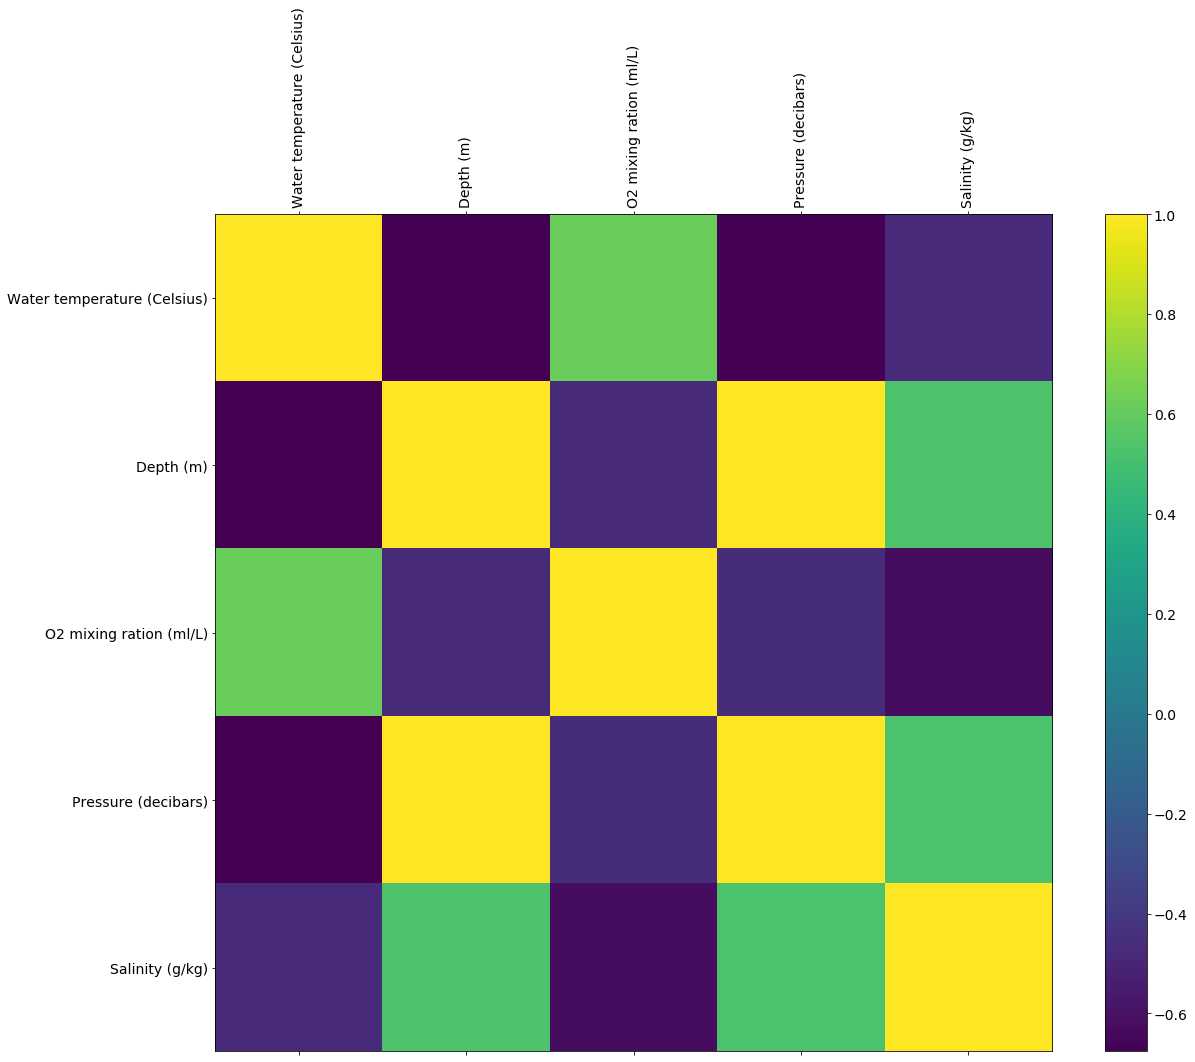

In [26]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df_numeric.corr(), fignum=f.number)
plt.xticks(range(df_numeric.shape[1]), df_numeric.columns, fontsize=14, rotation=90)
plt.yticks(range(df_numeric.shape[1]), df_numeric.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
#plt.savefig('correlation_matrix.png')
plt.show()

In [27]:
cor = df.corr()
print('Correlation of features with target (i.e. Water temperature)')
cor['Water temperature (Celsius)'].sort_values(ascending=False)

Correlation of features with target (i.e. Water temperature)


Water temperature (Celsius)    1.000000
O2 mixing ration (ml/L)        0.616164
Year                           0.074051
Salinity (g/kg)               -0.474769
Pressure (decibars)           -0.674507
Depth (m)                     -0.675837
Name: Water temperature (Celsius), dtype: float64

In [28]:
cor['Depth (m)'].sort_values(ascending=False)

Depth (m)                      1.000000
Pressure (decibars)            0.999994
Salinity (g/kg)                0.529288
Year                          -0.152748
O2 mixing ration (ml/L)       -0.466987
Water temperature (Celsius)   -0.675837
Name: Depth (m), dtype: float64

As shown in the correlation matrix and correlation values above, Pressure and Depth have a direct correlation with eachother (0.99999). Therefore, I will drop Pressure since they are highly correlated and could contaminate the result since we want to assume each feature independently affect the target and not directly correlated with each other. In addition, through analyzing the graphs shown in the Jupyter notebook it looks like the researchers changed from taking monthly samples to quarterly samples in 1985 (with a few exceptions). Consequently, for the final project we should convert months into quarters before we run the machine learning algorithm. 

In [29]:
df.drop('Pressure (decibars)', inplace = True, axis=1)

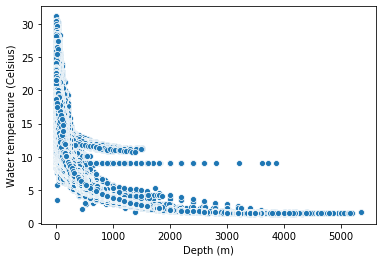

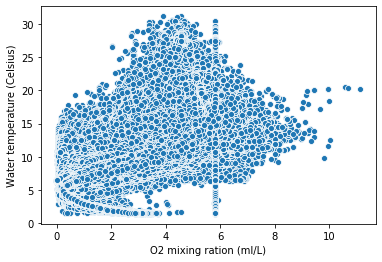

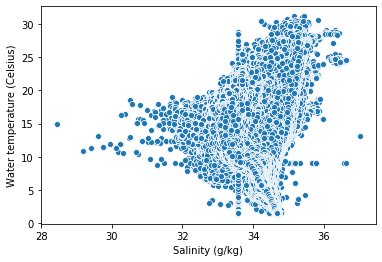

In [30]:
df_interest = [
              'Depth (m)',
              'O2 mixing ration (ml/L)', 
              'Salinity (g/kg)']
for val in df_interest:
    ax = sns.scatterplot(x = val, y = 'Water temperature (Celsius)', data = df)
    #ax.xaxis.set_major_locator(ticker.LinearLocator())
    plt.show()

In [31]:
#df['Depth (m)'] = 1/(1+df['Depth (m)'])

## Normalize data

Create a list of columns to normalize and then normalize those columns. 

In [32]:
cols_to_norm = ['Depth (m)', 
                'Water temperature (Celsius)',
                'O2 mixing ration (ml/L)', 
                'Salinity (g/kg)']
df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

## Exploratory Data Analysis

Create a new dataframe that has grouped the dataframe by month and year and aggregated all numeric columns by their mean. 

In [33]:
df1 = df.groupby(['Year', 'Month']).agg({'Depth (m)': 'mean', 
                                'Water temperature (Celsius)': 'mean',
                                'O2 mixing ration (ml/L)':'mean',
                                'Salinity (g/kg)':'mean'})

Show the first 5 rows of the new df1 dataframe.

In [34]:
df1.head()

Depth (m)  Water temperature (Celsius)  \
Year Month                                              
1949 January         NaN                          NaN   
     February        NaN                          NaN   
     March      0.064381                     0.264428   
     April      0.065855                     0.244974   
     May        0.063559                     0.245896   

               O2 mixing ration (ml/L)  Salinity (g/kg)  
Year Month                                               
1949 January                       NaN              NaN  
     February                      NaN              NaN  
     March                    0.521544         0.626504  
     April                    0.280979         0.626963  
     May                      0.280653         0.624056

Then reset the index for the dataframe.

In [35]:
df1.reset_index(inplace=True)

## Normalize the data for graphing

Unpivot the numeric values in a new dataframe called df2 and then have two new columns for Feature and Mean. We can use this to graph all numeric features for a single year per month. 

In [36]:
df2 = pd.melt(df1, id_vars = ['Year','Month'], 
              value_vars=['Depth (m)', 'Water temperature (Celsius)','O2 mixing ration (ml/L)', 'Salinity (g/kg)'],  
              var_name='Feature',
             value_name='Mean')
df2

,Year,Month,Feature,Mean
0,1949,January,Depth (m),NaN
1,1949,February,Depth (m),NaN
2,1949,March,Depth (m),0.064381
3,1949,April,Depth (m),0.065855
4,1949,May,Depth (m),0.063559
...,...,...,...,...
3211,2016,August,Salinity (g/kg),NaN
3212,2016,September,Salinity (g/kg),NaN
3213,2016,October,Salinity (g/kg),NaN
3214,2016,November,Salinity (g/kg),0.606522


Create the graphs with x-axis showing each month in a year ordered from January to December and each colour representng a different numeric column. Then the graphs are organized per year startng in 1949 and ending in 2019. 

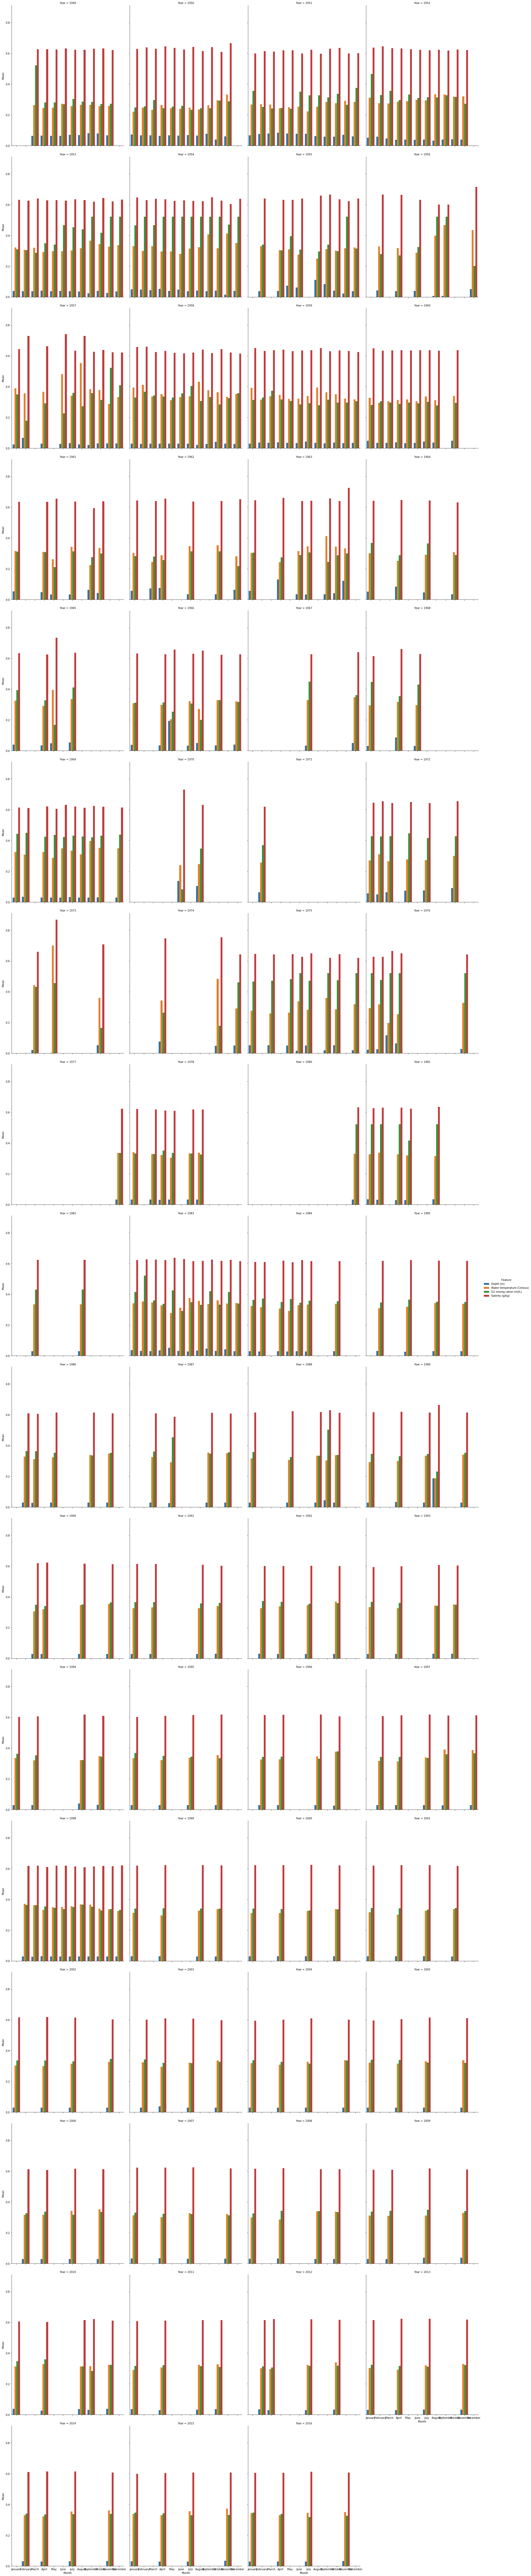

In [37]:
g = sns.catplot(x="Month", y='Mean', hue="Feature",
                col="Year", col_wrap=4, data=df2,
                orient = 'v',
                margin_titles = True,
                legend_out = True,
                legend = True, 
                kind="bar",
                height=8, aspect=.8)

Through analyzing the graphs shown in the Jupyter notebook it looks like the researchers changed from taking monthly samples to quarterly samples in 1985 (with some exceptions). Therefore, for the final project we should convert months into quarters before we run the machine learning algorithm.  

Then I want to see the the min, max, std and mean for each year for each numeric column.

In [38]:
df_metrics = df.groupby(['Year']).agg({'Depth (m)': ['mean', 'std','min','max'], 
                                'Water temperature (Celsius)': ['mean', 'std','min','max'],
                                'O2 mixing ration (ml/L)':['mean', 'std','min','max'],
                                'Salinity (g/kg)':['mean', 'std','min','max']})

In [39]:
df_metrics

Depth (m)                          Water temperature (Celsius)            \
          mean       std  min       max                        mean       std   
Year                                                                            
1949  0.069736  0.075813  0.0  0.703046                    0.258727  0.157139   
1950  0.064188  0.065630  0.0  0.624182                    0.258714  0.146984   
1951  0.072032  0.082077  0.0  0.672958                    0.260746  0.149065   
1952  0.041887  0.047997  0.0  0.285180                    0.298753  0.131248   
1953  0.037395  0.043555  0.0  0.555036                    0.309936  0.124734   
...        ...       ...  ...       ...                         ...       ...   
2012  0.031667  0.041089  0.0  0.654083                    0.316007  0.117993   
2013  0.031493  0.039667  0.0  0.654831                    0.311010  0.114743   
2014  0.030795  0.040406  0.0  0.653896                    0.344113  0.140551   
2015  0.030330  0.034858  0.0  0.654270                    0.348091  0.144563   
2016  0.029451  0.034385  0.0  0.654083                    0.341781  0.130832   

                         O2 mixing ration (ml/L)                      \
           min       max                    mean       std       min   
Year                                                                   
1949  0.003367  0.766330                0.299536  0.200442  0.006284   
1950  0.003367  0.869024                0.262204  0.194786  0.006284   
1951  0.003367  0.912458                0.298025  0.203341  0.004488   
1952  0.053199  0.797980                0.327882  0.198897  0.000898   
1953  0.007744  0.860943                0.386271  0.188742  0.009874   
...        ...       ...                     ...       ...       ...   
2012  0.003704  0.641414                0.313818  0.190117  0.001795   
2013  0.003535  0.668418                0.319076  0.187038  0.000987   
2014  0.003636  0.728249                0.337101  0.181033  0.001616   
2015  0.003805  0.713535                0.338200  0.177259  0.001795   
2016  0.003973  0.734714                0.334476  0.177897  0.001077   

               Salinity (g/kg)                                
           max            mean       std       min       max  
Year                                                          
1949  0.690305        0.626488  0.063162  0.211438  0.792630  
1950  0.662478        0.634292  0.059343  0.242822  0.796118  
1951  0.683124        0.612748  0.039155  0.434616  0.782169  
1952  0.782765        0.627800  0.053388  0.238173  0.734511  
1953  0.761221        0.630562  0.050474  0.495060  0.761246  
...        ...             ...       ...       ...       ...  
2012  0.848294        0.617978  0.044456  0.518424  0.726049  
2013  0.697487        0.619104  0.041922  0.516924  0.725851  
2014  0.847307        0.611266  0.044551  0.512438  0.726003  
2015  0.642729        0.603702  0.049009  0.491480  0.725933  
2016  0.705027        0.606762  0.047812  0.449831  0.725724  

[67 rows x 16 columns]

## Drop Month

In [40]:
df.drop(['Depth ID', 'Month'],axis=1, inplace=True)

## Lasso Regression

Split the data into the target (aka Temperature) and the features (aka everything else). 

In [41]:
df_lasso = df.copy()

In [42]:
y = df_lasso['Water temperature (Celsius)']
df_lasso.drop(['Water temperature (Celsius)','Year'], axis=1, inplace=True)

In [43]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_lasso, y, test_size = 0.3, random_state = 42)

In [44]:
def rmse_cv(model): 
    rmse = np.sqrt(-cross_val_score(model,X_train, y_train, scoring='neg_mean_absolute_error', cv=5))
    return rmse

In [45]:
model_lasso = LassoCV(alphas = [1,0.1,0.001,0.0005]).fit(X_train,y_train)
rmse_cv(model_lasso).mean()
coef = pd.Series(model_lasso.coef_,index = X_train.columns)
print('Lasso picked ' + str(sum(coef!= 0)) + ' variables and eliminated the other ' + str(sum(coef ==0)) + " variables")

Lasso picked 2 variables and eliminated the other 1 variables


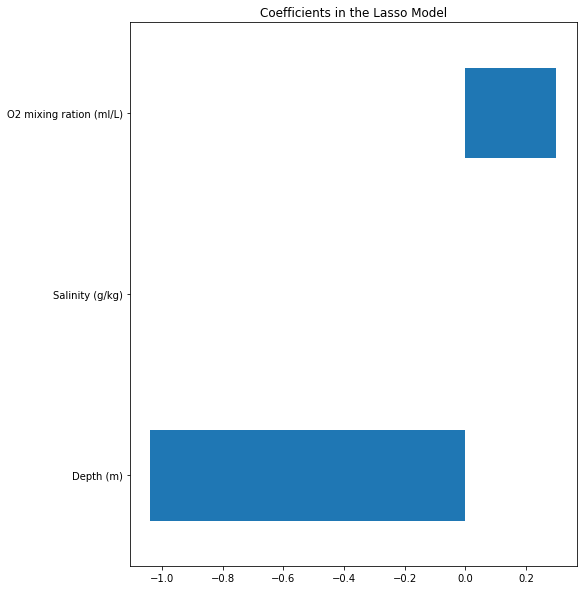

In [46]:
imp_coef = pd.concat([coef.sort_values().head(2), coef.sort_values().tail(1)])
plt.rcParams['figure.figsize'] = (8, 10)
imp_coef.plot(kind='barh')
plt.title('Coefficients in the Lasso Model')
#plt.savefig('lasso.png')
plt.show()

In order to analyze the correlation between features I will select one Year (i.e. selecting the year which has the highest number of occurances in the dataset based on the code below). I assume a single year has similar attributes in terms of external factors (such as climate change effects and pollution) which will help eliminate contamination of my analysis. If I do not do this external variables could be highly correlated with temperature which would distort my results. Therefore, I will ensure there are not external variables contaminating the analysis through establishing a scope/boundary for single year. Moreover, this process could be duplicated for every year.

In [47]:
df.Year.value_counts()

1951    40459
1950    38298
1959    34395
1984    33256
1952    31690
        ...  
1977     1743
1970     1321
1980     1226
1971     1030
1982      698
Name: Year, Length: 67, dtype: int64

Create a subset of the dataset dataframe which only consists of the year 1951

In [90]:
df_sub = df[df['Year'] == 1951]

In [91]:
y = df_sub['Water temperature (Celsius)']
df_sub.drop('Water temperature (Celsius)', axis=1, inplace=True)

#### Train, Test and Split
Because I filtered by X to contain only the features selected by lasso I must regenerate my training and test data so it represents this change. 

In [92]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_sub[list(imp_coef.index)], y, test_size = 0.3, random_state = 42)

In [51]:
from sklearn.utils.testing import all_estimators
from sklearn import base
estimators = all_estimators(type_filter='regressor')
import_list = []
for name, class_ in estimators:
    import_list.append(class_)

In [52]:
list_of_regressors = []
for name, class_ in estimators:
    list_of_regressors.append(name)

In [53]:
[s + '()' for s in list_of_regressors]

['ARDRegression()',
 'AdaBoostRegressor()',
 'BaggingRegressor()',
 'BayesianRidge()',
 'CCA()',
 'DecisionTreeRegressor()',
 'DummyRegressor()',
 'ElasticNet()',
 'ElasticNetCV()',
 'ExtraTreeRegressor()',
 'ExtraTreesRegressor()',
 'GaussianProcessRegressor()',
 'GradientBoostingRegressor()',
 'HistGradientBoostingRegressor()',
 'HuberRegressor()',
 'IsotonicRegression()',
 'KNeighborsRegressor()',
 'KernelRidge()',
 'Lars()',
 'LarsCV()',
 'Lasso()',
 'LassoCV()',
 'LassoLars()',
 'LassoLarsCV()',
 'LassoLarsIC()',
 'LinearRegression()',
 'LinearSVR()',
 'MLPRegressor()',
 'MultiOutputRegressor()',
 'MultiTaskElasticNet()',
 'MultiTaskElasticNetCV()',
 'MultiTaskLasso()',
 'MultiTaskLassoCV()',
 'NuSVR()',
 'OrthogonalMatchingPursuit()',
 'OrthogonalMatchingPursuitCV()',
 'PLSCanonical()',
 'PLSRegression()',
 'PassiveAggressiveRegressor()',
 'RANSACRegressor()',
 'RadiusNeighborsRegressor()',
 'RandomForestRegressor()',
 'RegressorChain()',
 'Ridge()',
 'RidgeCV()',
 'SGDRegressor(

In [54]:
list_of_regressors = [
                      AdaBoostRegressor(),
                     BaggingRegressor(),
                     BayesianRidge(),
                     #CCA(),
                     DecisionTreeRegressor(),
                    #DummyRegressor(),
                     #ElasticNet(),
                     ElasticNetCV(),
                     ExtraTreeRegressor(),
                     ExtraTreesRegressor(),
                     #GaussianProcessRegressor(),
                     GradientBoostingRegressor(),
                     HistGradientBoostingRegressor(),
                    HuberRegressor(),
                     #IsotonicRegression(),
                     KNeighborsRegressor(),
                    RandomForestRegressor(),
                     #Lars(),
                     #LarsCV(),
                     #LassoLars(),
                     #LassoLarsCV(),
                     #LassoLarsIC(),
                     LinearRegression()]
                     #LinearSVR(),
                     #MLPRegressor(),
                     #MultiOutputRegressor(estimator=model_fit),
                     #MultiTaskElasticNet(),
                     #MultiTaskElasticNetCV(),
                     #MultiTaskLasso(),
                     #MultiTaskLassoCV(),
                     #NuSVR(),
                     #OrthogonalMatchingPursuit(),
                     #OrthogonalMatchingPursuitCV(),
                     #PLSCanonical(),
                     #PLSRegression(),
                     #PassiveAggressiveRegressor(),
                     #RANSACRegressor(),
                     #RadiusNeighborsRegressor(),
                     #RegressorChain(base_estimator=model_fit),
                     #Ridge(),
                     #RidgeCV(),
                     #SGDRegressor(),
                     #SVR()]
                     #StackingRegressor(estimators=model_fit),
                     #TheilSenRegressor(),
                     #TransformedTargetRegressor()]
                     #VotingRegressor(estimators=model_fit),
                    #_SigmoidCalibration()]

In [55]:
metrics_all_regressors = pd.DataFrame(columns = ['Regressor',
                                                     'Accuracy (%)',
                                                     'Explained Variation Score',
                                                     'Mean Squared Error',
                                                     'Mean Absolute Error', 
                                                     'Real Mean Squared Error (RSME)'])   

In [56]:
best_accuracy = 0 
i=0

for regressor in list_of_regressors:
    tt = TransformedTargetRegressor(regressor=regressor, func=np.log, inverse_func=np.exp)
        
    model      = tt
    model_name = type(regressor).__name__

  
    #Fit the data
    model_fit = model.fit(X_train,y_train)
    y_pred   = model.predict(X_test)

    accuracy = model_fit.score(X_test, y_test)*100
    ex_var = explained_variance_score(y_test, y_pred)
    mse = MSE(y_test, y_pred)
    mae = MAE(y_test, y_pred)
    rmse = np.sqrt(MSE(y_test, y_pred))
    
    
    metrics_all_regressors.loc[i] = [model_name, accuracy, ex_var, mse, mae, rmse]
    i += 1


In [57]:
metrics_all_regressors = metrics_all_regressors.sort_values(by=['Accuracy (%)'],ascending=False)
metrics_all_regressors

,Regressor,Accuracy (%),Explained Variation Score,Mean Squared Error,Mean Absolute Error,Real Mean Squared Error (RSME)
8,HistGradientBoostingRegressor,85.578750,0.856733,0.003251,0.033743,0.057015
7,GradientBoostingRegressor,84.830780,0.849609,0.003419,0.035669,0.058475
11,RandomForestRegressor,83.116980,0.831674,0.003806,0.035437,0.061690
1,BaggingRegressor,82.801574,0.828537,0.003877,0.035886,0.062264
10,KNeighborsRegressor,81.760185,0.818274,0.004112,0.036701,0.064121
6,ExtraTreesRegressor,81.540999,0.815715,0.004161,0.036473,0.064505
3,DecisionTreeRegressor,77.856678,0.778647,0.004991,0.039275,0.070650
0,AdaBoostRegressor,77.822265,0.780106,0.004999,0.048268,0.070705
5,ExtraTreeRegressor,77.672015,0.776836,0.005033,0.039636,0.070944
12,LinearRegression,73.053564,0.736040,0.006074,0.050897,0.077937


## Function to generate the Learning Curves for all three of the Regressors

In [58]:
def plot_learning_curve(estimator, title, X, y, train_sizes=np.linspace(0.1, 1.0, 5)): 
    plt.figure()
    plt.title(title) 
    plt.xlabel("Training examples") 
    plt.ylabel("Score") 
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, train_sizes=train_sizes) 
    train_scores_mean = np.mean(train_scores, axis=1) 
    train_scores_std = np.std(train_scores, axis=1) 
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1) 
    plt.grid() 
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r") 
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g") 
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score") 
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score") 
    plt.legend(loc="best") 
    return plt.show()

## Random Forest Regressor

In [59]:
def RandomForest(param_grid, n_jobs): 
    estimator = RandomForestRegressor()
    clf = GridSearchCV(estimator=estimator, param_grid=param_grid, n_jobs=n_jobs)
    clf.fit(X_train, y_train)
    print ("Best Estimator learned through GridSearch")
    print (clf.best_estimator_)
    return clf.best_estimator_

In [60]:
#Testing the gradient boosting regressor however the hyperparameter tuning took too long
param_grid={'n_estimators':[5,10, 50, 100],
            #'criterion': ['mse', 'mae'],
            #'max_depth': [5, 10, 25, 50], 
            #'min_samples_split': [2, 5, 10]
           } 
n_jobs=4

In [61]:
best_est=RandomForest(param_grid, n_jobs)

Best Estimator learned through GridSearch
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


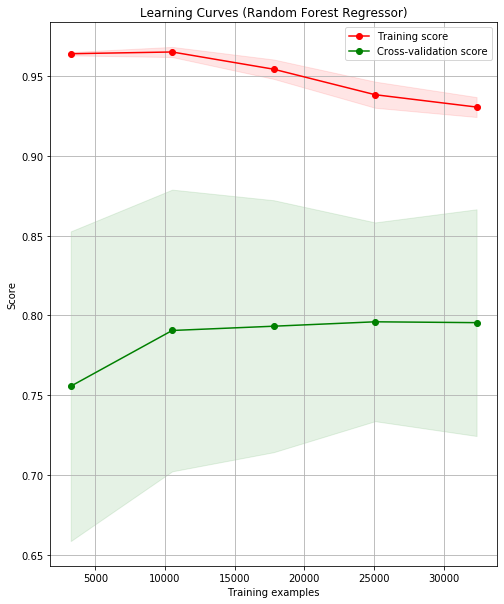

In [93]:
title = "Learning Curves (Random Forest Regressor)" 
estimator = RandomForestRegressor(n_estimators=100)
estimator.fit(df_sub, y) 
plot_learning_curve(estimator, title, df_sub, y) 
plt.show() 

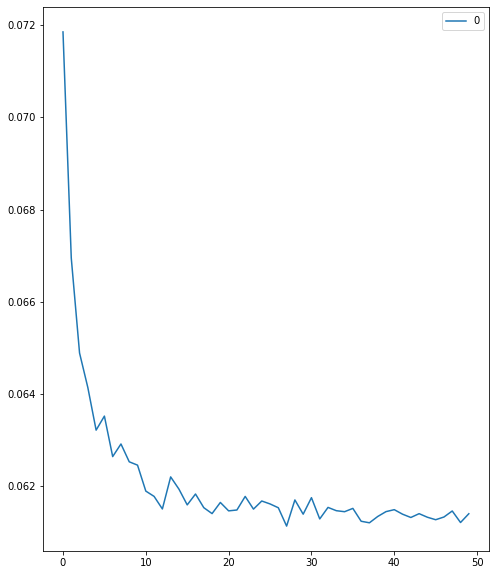

In [63]:
rmse_val1 = [] 
for depth in range(50):
    depth += 1
    rf = RandomForestRegressor(n_estimators=depth)
    rf.fit(X_train, y_train)  
    y_pred=rf.predict(X_test) 
    rsme = np.sqrt(MSE(y_test,y_pred)) 
    rmse_val1.append(rsme) 
    
rsme_plot = pd.DataFrame(rmse_val1)  
rsme_plot.plot()

## Gradient Boosting Regressor

Unfortunately the gradient boosting regressor took more than 24 hours to complete and therefore, will not be included in the analysis. 

In [64]:
def GradientBooster(param_grid, n_jobs): 
    estimator = GradientBoostingRegressor()
    clf = GridSearchCV(estimator=estimator, param_grid=param_grid, n_jobs=n_jobs)
    clf.fit(X_train, y_train)
    print ("Best Estimator learned through GridSearch")
    print (clf.best_estimator_)
    return clf.best_estimator_

In [86]:
#Testing the gradient boosting regressor however the hyperparameter tuning took too long
param_grid={#'loss':['ls','lad', 'huber'], 
            'learning_rate': [0.1, 0.5, 0.2, 0.8] 
            #'max_depth':[2, 5,8], 
            #'min_samples_leaf':[3, 8,10], 
           } 
n_jobs=4

Code below can be used as a next step for hyperparameter tuning for the gradient boosting regressor. For now it is commented out in case someone wants to "Run All".

In [87]:
best_est=GradientBooster(param_grid, n_jobs)

Best Estimator learned through GridSearch
GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.5, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


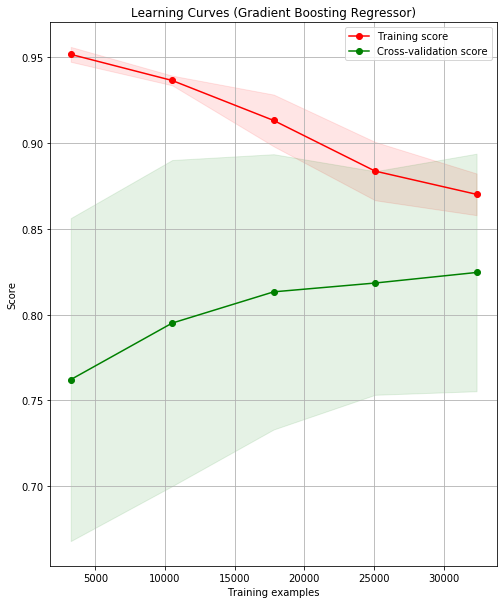

In [94]:
title = "Learning Curves (Gradient Boosting Regressor)" 
estimator = GradientBoostingRegressor(learning_rate=0.5)
estimator.fit(df_sub, y) 
plot_learning_curve(estimator, title, df_sub, y) 
plt.show() 

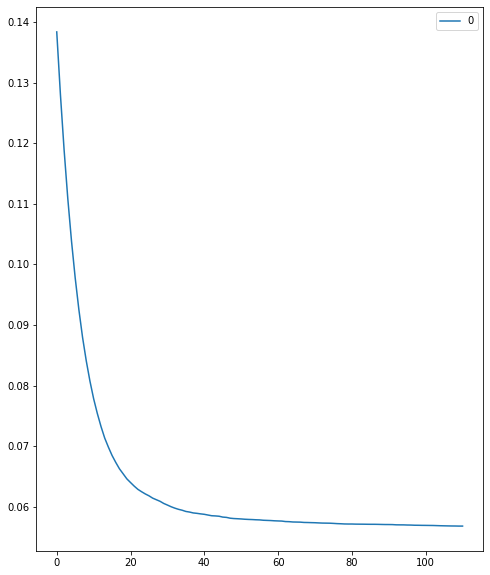

In [68]:
rmse_val2 = [] 
for nest in range(111):
    nest += 1
    gbr = GradientBoostingRegressor(n_estimators=nest)
    gbr.fit(X_train, y_train)  
    y_pred=gbr.predict(X_test) 
    rsme = np.sqrt(MSE(y_test,y_pred)) 
    rmse_val2.append(rsme) 
    
rsme_plot = pd.DataFrame(rmse_val2)  
rsme_plot.plot()

## KNN Regressor

In [69]:
param_grid = dict(n_neighbors=list(range(1,30)),leaf_size=list(range(1,50)),p=[1,2], weights=['uniform', 'distance'])
n_jobs=4
estimator = KNeighborsRegressor()
clf = GridSearchCV(estimator, param_grid, cv=10)
best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Bestest leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Bestest p:', best_model.best_estimator_.get_params()['p'])
print('Bestest n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Bestest leaf_size: 1
Bestest p: 1
Bestest n_neighbors: 22


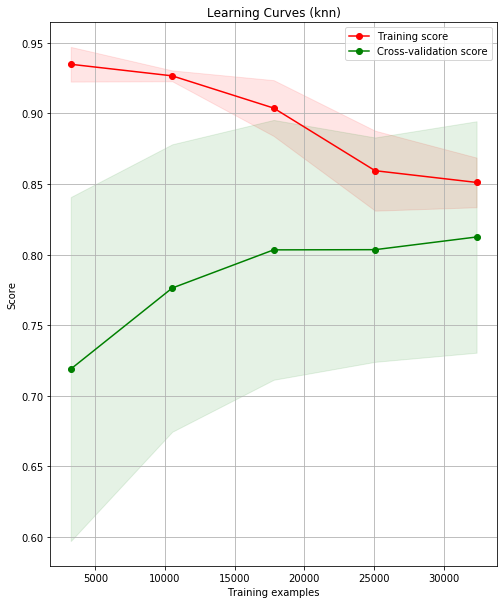

In [70]:
title = "Learning Curves (knn)" 
estimator = KNeighborsRegressor(leaf_size=13, p=2, n_neighbors = 22) 
estimator.fit(df_sub, y) 
plot_learning_curve(estimator, title, df_sub, y) 
plt.show() 

In [71]:
print(best_model.score(X_train,y_train))
print(best_model.score(X_test,y_test))

0.8501020082947834
0.8448310284936911


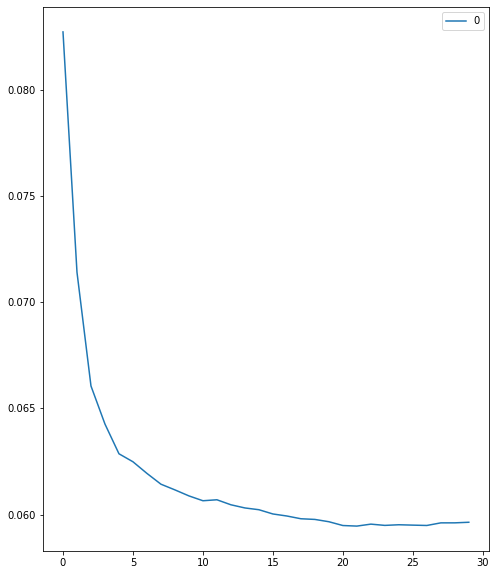

In [72]:
rmse_val = [] 
for K in range(30):
    K += 1
    knn = KNeighborsRegressor(n_neighbors = K,leaf_size=13, p=2)
    knn.fit(X_train, y_train)  
    y_pred=knn.predict(X_test) 
    rsme = np.sqrt(MSE(y_test,y_pred)) 
    rmse_val.append(rsme) 
    
elbow = pd.DataFrame(rmse_val)  
elbow.plot()

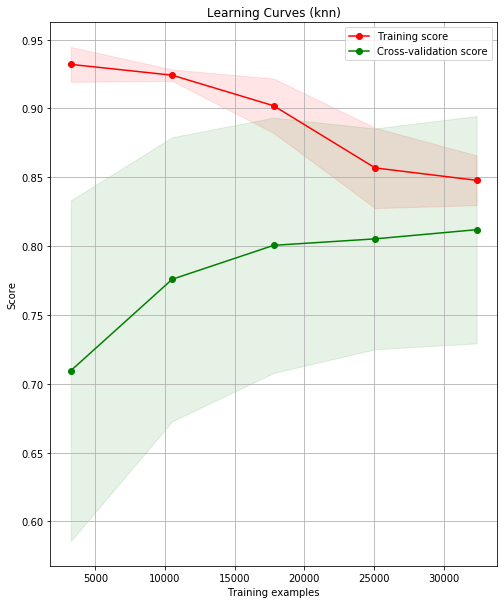

In [73]:
title = "Learning Curves (knn)" 
estimator = KNeighborsRegressor(leaf_size=13, p=2, n_neighbors = 30) 
estimator.fit(df_sub, y) 
plot_learning_curve(estimator, title, df_sub, y) 
plt.show() 

In [95]:
metrics_knn = pd.DataFrame(columns = ['Regressor',
                                    'Accuracy (%)',
                                    'Explained Variation Score',
                                    'Mean Squared Error',
                                    'Mean Absolute Error', 
                                    'Real Mean Squared Error (RSME)'])  

In [96]:
df_sub2 = df[df['Year'] == 1950]
y = df_sub2['Water temperature (Celsius)']
df_sub2.drop('Water temperature (Celsius)', axis=1, inplace=True) 
X_train, X_test, y_train, y_test = train_test_split(df_sub2[list(imp_coef.index)], y, test_size = 0.3, random_state = 42)
new_list_of_regressors = [GradientBoostingRegressor(learning_rate=0.5),
                     KNeighborsRegressor(leaf_size=13, p=2, n_neighbors = 22),
                    RandomForestRegressor(n_estimators=100)]

best_accuracy = 0 
i=0

for regressor in new_list_of_regressors:
    tt = TransformedTargetRegressor(regressor=regressor, func=np.log, inverse_func=np.exp)
        
    model      = tt
    model_name = type(regressor).__name__

  
    #Fit the data
    model_fit = model.fit(X_train,y_train)
    y_pred   = model.predict(X_test)

    accuracy = model_fit.score(X_test, y_test)*100
    ex_var = explained_variance_score(y_test, y_pred)
    mse = MSE(y_test, y_pred)
    mae = MAE(y_test, y_pred)
    rmse = np.sqrt(MSE(y_test, y_pred))
    
    
    metrics_knn.loc[i] = [model_name, accuracy, ex_var, mse, mae, rmse]
    i += 1

In [76]:
metrics_knn = metrics_knn.sort_values(by=['Accuracy (%)'],ascending=False)
metrics_knn

,Regressor,Accuracy (%),Explained Variation Score,Mean Squared Error,Mean Absolute Error,Real Mean Squared Error (RSME)
2,RandomForestRegressor,91.026271,0.910572,0.001931,0.025482,0.043946
1,KNeighborsRegressor,90.442412,0.904736,0.002057,0.026410,0.045353
0,GradientBoostingRegressor,89.806889,0.898907,0.002194,0.029348,0.046837


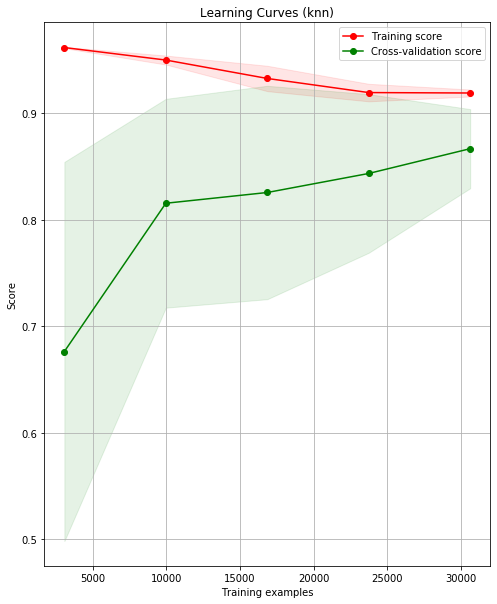

In [77]:
title = "Learning Curves (knn)" 
estimator = KNeighborsRegressor(leaf_size=13, p=2, n_neighbors = 22) 
estimator.fit(df_sub2, y) 
plot_learning_curve(estimator, title, df_sub2, y) 
plt.show() 

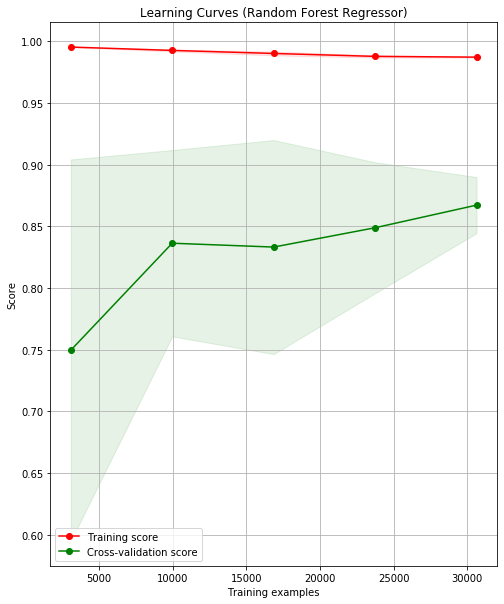

In [78]:
title = "Learning Curves (Random Forest Regressor)" 
estimator = RandomForestRegressor()
estimator.fit(df_sub2, y) 
plot_learning_curve(estimator, title, df_sub2, y) 
plt.show() 

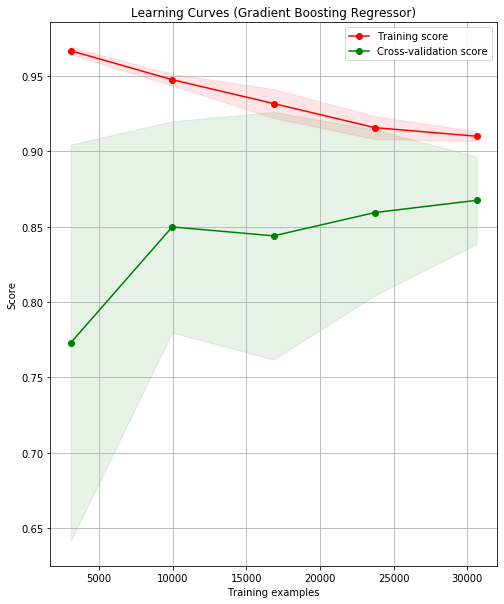

In [79]:
title = "Learning Curves (Gradient Boosting Regressor)" 
estimator = GradientBoostingRegressor()
estimator.fit(df_sub2, y) 
plot_learning_curve(estimator, title, df_sub2, y) 
plt.show() 

In [97]:
metrics_knn1 = pd.DataFrame(columns = ['Regressor',
                                    'Accuracy (%)',
                                    'Explained Variation Score',
                                    'Mean Squared Error',
                                    'Mean Absolute Error', 
                                    'Real Mean Squared Error (RSME)']) 

In [98]:
df_sub3 = df[df['Year'] == 1984]
y = df_sub3['Water temperature (Celsius)']
df_sub3.drop('Water temperature (Celsius)', axis=1, inplace=True) 
X_train, X_test, y_train, y_test = train_test_split(df_sub3[list(imp_coef.index)], y, test_size = 0.3, random_state = 42)

new_list_of_regressors = [GradientBoostingRegressor(learning_rate=0.5),
                     KNeighborsRegressor(leaf_size=13, p=2, n_neighbors = 22),
                    RandomForestRegressor(n_estimators=100)]

best_accuracy = 0 
i=0

for regressor in new_list_of_regressors:
    tt = TransformedTargetRegressor(regressor=regressor, func=np.log, inverse_func=np.exp)
        
    model      = tt
    model_name = type(regressor).__name__

  
    #Fit the data
    model_fit = model.fit(X_train,y_train)
    y_pred   = model.predict(X_test)

    accuracy = model_fit.score(X_test, y_test)*100
    ex_var = explained_variance_score(y_test, y_pred)
    mse = MSE(y_test, y_pred)
    mae = MAE(y_test, y_pred)
    rmse = np.sqrt(MSE(y_test, y_pred))
    
    
    metrics_knn1.loc[i] = [model_name, accuracy, ex_var, mse, mae, rmse]
    i += 1

In [99]:
metrics_knn1 = metrics_knn.sort_values(by=['Accuracy (%)'],ascending=False)
metrics_knn1

,Regressor,Accuracy (%),Explained Variation Score,Mean Squared Error,Mean Absolute Error,Real Mean Squared Error (RSME)
2,RandomForestRegressor,91.082139,0.911111,0.001919,0.025459,0.043809
0,GradientBoostingRegressor,91.026665,0.910806,0.001931,0.026866,0.043945
1,KNeighborsRegressor,90.699499,0.907586,0.002002,0.026294,0.044739


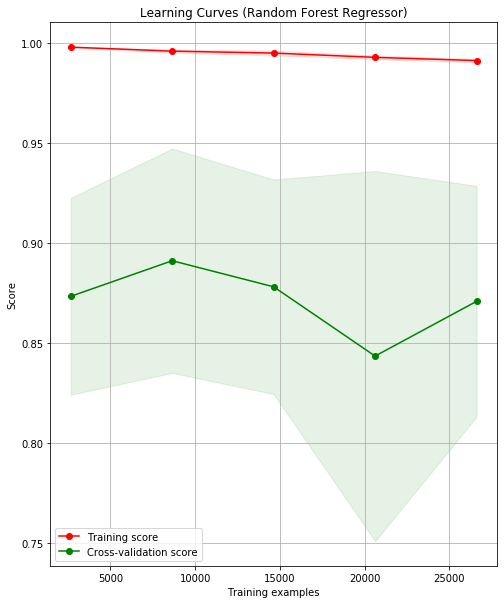

In [101]:
title = "Learning Curves (Random Forest Regressor)" 
estimator = RandomForestRegressor(n_estimators=100)
estimator.fit(df_sub3, y) 
plot_learning_curve(estimator, title, df_sub3, y) 
plt.show() 

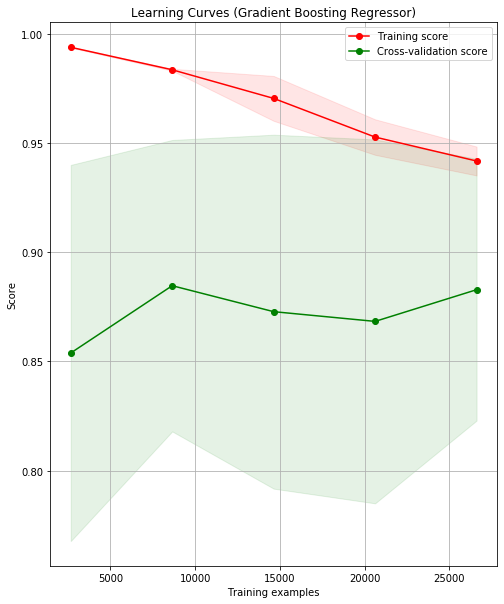

In [100]:
title = "Learning Curves (Gradient Boosting Regressor)" 
estimator = GradientBoostingRegressor(learning_rate=0.5)
estimator.fit(df_sub3, y) 
plot_learning_curve(estimator, title, df_sub3, y) 
plt.show() 